In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# Unidad I: Ejemplos Simulacion Experimentos Discretos

**Exemplo 1:**
Experimento de lanzar un dado $n$-veces. Para ello, cada realización del experimento la denotamos por $X_i\in \Omega =\left\{1,..,6 \right\}$, donde $\Omega$ es el **espacio muestreal**. _Propuesto_

**Ejemplo 2:** Simular el lanzamiento independiente de $n$-monedas. Paar ello, cada ejeccución se denota por $X_i\in \Omega$  donde $\Omega=\left\{0,1\right\}$ es el conjunto **binario**.  Consideramos el caso equilbrado donde $p(0)=0.5$ y $p(1)=0.5$

i) Simulacion de una tirada $X_1,..,X_N$

In [3]:
#--------------------------------------------------

coin = np.array(['Heads', 'Tails'])

N = 10000 # number of realizarions
#1. generar las $N$ realizaciones del experimento
tosses = np.random.choice(coin, N)
tosses[0:100]

array(['Heads', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads', 'Heads',
       'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Heads',
       'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Heads',
       'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails',
       'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails',
       'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads',
       'Heads', 'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails',
       'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails',
       'Tails', 'Tails', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails',
       'Heads', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Tails', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Heads', 'Hea

el numero de caras es:  5064 y la frecuencia es: 0.05064
el numero de sellos es 94936 y la frecuencia es: 0.94936


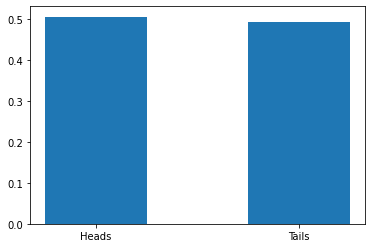

In [59]:
#2. contar el numero de "heads"
head_counts= np.count_nonzero(tosses == 'Heads')
print("el numero de caras es: ",head_counts, "y la frecuencia es:", head_counts/N)
print("el numero de sellos es",N-head_counts, "y la frecuencia es:", (N-head_counts)/N)
plt.hist(tosses, density=True, bins=[0,1,2], align="left", rwidth=0.5);

In [18]:
plt.hist?

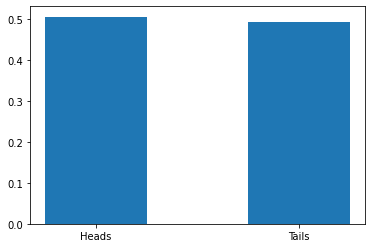

**ii) Convergiendo a la Ley $p=0.5$**

---

Ahora veamos el efecto de aumentar la cantidad de datos $N$. Consideraremos para ello 4 escenarios: 

1.   $N=10^2$;$N=10^3$;$N=10^4$; y $N=10^5$  
2.   Para cada secuencia $X_1,..,X_N$ calculamos $\frac{1}{n}\sum_{i=1}^N 1_{\left\{ head\right\}}(X_i)$ (frecuencia de ocurrencia de "head" en $X_1,..,X_N$)
1.   Repetimos el punto anterior $1.000$ (variable N_iteration) veces y  mostramos como cambia este valor en cada una de los $1.000$ instancias y esto como funcion del valor de $N$.

In [87]:
m = 2
N = 10**(m+2)

#numero de repeticiones del experimento para un $N$ dado
N_iterations=1000
sequence_id = np.arange(N_iterations)
z = {}

#main loop: asociado al largo de $N$
for m in np.arange(4,dtype=int):
    N=10**(m+2)
    z[str(N)]=np.zeros(N_iterations)
    #main for: 
    for i in sequence_id: 
        #1. simular la ejecucion de los $n$ lanzamientos independientes $X_1,..,X_n$
        outcomes = np.random.choice(coin, N)
        #2. contar los "heads" en $X_1,..,X_n$
        num_heads = np.count_nonzero(outcomes == 'Heads')
        #3. contar los "tails" en $X_1,..,X_n$
        num_heads_tails= N - num_heads

        #almacenar la informacion en un arreglo de 1.000 puntos. 
        z[str(N)][i]= num_heads
        
# The simulation is done!


Text(0.5, 1.0, 'Observando la Convergencia a la ley p=0.5')

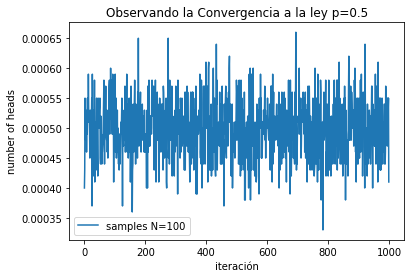

In [86]:
plt.plot(sequence_id,z["100"]/N, label='samples N=100')
plt.legend()
plt.xlabel('iteración')
plt.ylabel('number of heads')
plt.title("Observando la Convergencia a la ley p=0.5")

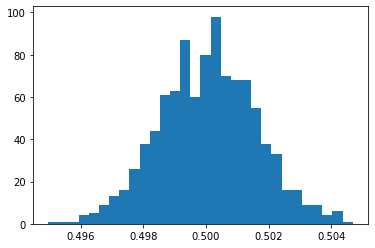

In [62]:
#histograma de valores.....
plt.hist(z/N, 30);
#plt.hist(z/N, 20);
#plt.hist(z/N, 40);
#plt.hist(z/N, 80);

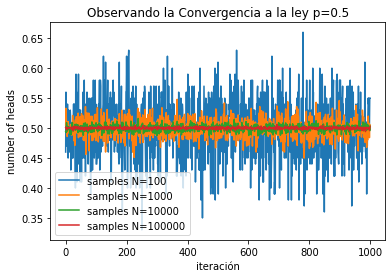

In [88]:
for m in np.arange(4,dtype=int):
    N=10**(m+2)
    plt.plot(sequence_id,z[str(N)]/N, label='samples N='+ str(N))
    plt.legend()
    plt.xlabel('iteración')
    plt.ylabel('number of heads')
    plt.title("Observando la Convergencia a la ley p=0.5")

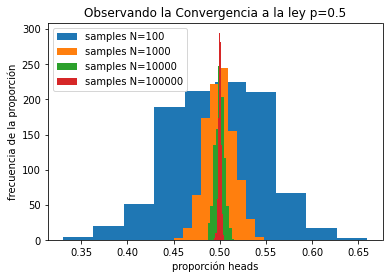

In [91]:
# histogramas
for n, x in z.items():
    plt.hist(x/int(n), label='samples N='+ n)
    plt.legend()
    plt.xlabel('proporción heads')
    plt.ylabel('frecuencia de la proporción')
    plt.title("Observando la Convergencia a la ley p=0.5")

# Unidad I: Ejemplo Simulacion Experimento Continuo

**Ejemplo 1:** Distribucion uniforme en $[0,1]$

**i)** Generación de las muestras $X_1,..,X_n$

In [92]:
#CREATING THE EMPIRICAL DATA -------------------
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

M=10000
uniform=rand(M,1)
index = np.linspace(1, M, M)
uniform[0:20]


array([[0.75059358],
       [0.31077845],
       [0.81351873],
       [0.12661   ],
       [0.52777329],
       [0.73833059],
       [0.94647465],
       [0.31343107],
       [0.70757184],
       [0.985305  ],
       [0.53349597],
       [0.55211007],
       [0.52346632],
       [0.91812764],
       [0.1168487 ],
       [0.85481968],
       [0.51309646],
       [0.26876203],
       [0.12302785],
       [0.88264583]])

Text(0.5, 1.0, 'Random Samples')

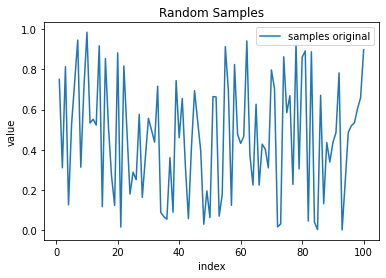

In [93]:
# Desplegar los datos.......
#plt.plot(index,uniform, label='samples original')
plt.plot(index[0:100],uniform[0:100], label='samples original')
plt.legend()
plt.xlabel('index')
plt.ylabel('value')
plt.title("Random Samples")

**ii)** Calculo de Frecuencias en Sub-intervalos de $[0,1]$

(array([2548., 2485., 2471., 2496.]),
 array([5.34855089e-05, 2.50035727e-01, 5.00017968e-01, 7.50000209e-01,
        9.99982450e-01]),
 <BarContainer object of 4 artists>)

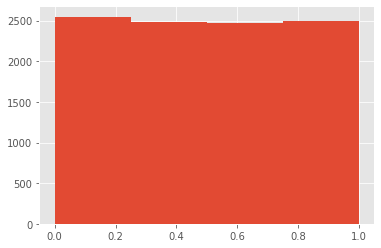

In [94]:
K=4 # Numero de Intervalos 
#hist, bin_edges = np.histogram(uniform,M)
plt.style.use('ggplot')
plt.hist(uniform,K)

**iii)** Calculo de Frecuencias en Sub-intervalos (Resolucion 2) 
1.   $A^2_1=[0,0.25]$     
2.   $A^2_2=(0.25,0.5]$
1.   $A^2_3=(0.5,0.75]$
2.   $A^2_4=(0.25,1]$

In [95]:
def indicator(x):
   L=len(x)
   id = np.arange(L)
   truncated=np.zeros(L)

   #Codificar los valores de $x[i]$
   for i in id: 
      if x[i] <= 0.25:
        truncated[i]=1
      elif x[i] > 0.25 and x[i] <=0.5:
        truncated[i]=2
      elif x[i] > 0.5 and x[i] <=0.75:
        truncated[i]=3
      else: 
        truncated[i]=4

   return truncated  

Generar la secuencia discreta $U_j=1\cdot 1_{[0,0.25]}(X_j)+ 2\cdot 1_{(0.25,0.5]}(X_j) + 3\cdot 1_{(0.5,0.75]}(X_j) + 4\cdot 1_{(0.75,1]}(X_j)$

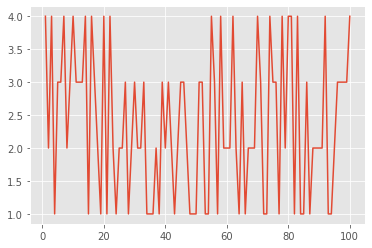

In [96]:
id_sequence=indicator(uniform)
index = np.linspace(1, M, M)
plt.plot(index[0:100],id_sequence[0:100], label='id')

Calculo de la frecuencias: 
1.   $n(A^2_1)=\frac{1}{n} \sum_{i=1}^n 1_{A^2_1}(X_i)$
1.   $n(A^2_2)=\frac{1}{n} \sum_{i=1}^n 1_{A^2_2}(X_i)$
2.   $n(A^2_3)=\frac{1}{n} \sum_{i=1}^n 1_{A^2_3}(X_i)$
2.   $n(A^2_4)=\frac{1}{n} \sum_{i=1}^n 1_{A^2_4}(X_i)$



In [97]:
#contar el numero de heads ---------
counts_1= np.count_nonzero(id_sequence == 1) 
counts_2= np.count_nonzero(id_sequence == 2) 
counts_3= np.count_nonzero(id_sequence == 3) 
counts_4= np.count_nonzero(id_sequence == 4) 
print("n(A^2_1) es", counts_1/M)
print("n(A^2_2) es", counts_2/M)
print("n(A^2_3) es", counts_3/M)
print("n(A^2_4) es", counts_4/M)

n(A^2_1) es 0.2548
n(A^2_2) es 0.2485
n(A^2_3) es 0.2471
n(A^2_4) es 0.2496


iii) Analisis de convergencia de la Frecuencia de $A^2_1$ a 0.25

Text(0.5, 1.0, 'Analisis Longitudinal de $n(A^2_1)$')

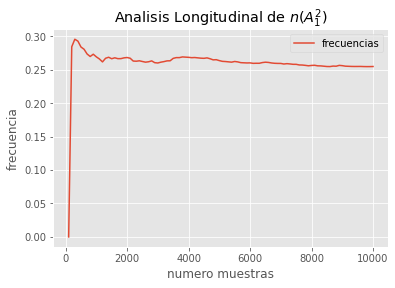

In [98]:
m = np.linspace(1, M, 100,dtype=int)
L=len(m)
id = np.arange(L)
counts_longitudinal=np.zeros(L)

#main iteration.....
for i in id: 
  counts_longitudinal[i] = np.count_nonzero(id_sequence[0:m[i]] == 1)/m[i]
  #print("frecuencia largo ",m[i], " es ", counts_longitudinal[i])

#Graficar valores........
index = np.linspace(1, L, L)*100
plt.plot(index,counts_longitudinal, label='frecuencias')
plt.legend()
plt.xlabel('numero muestras')
plt.ylabel('frecuencia')
plt.title("Analisis Longitudinal de $n(A^2_1)$")